This dataset is a large-scale collection of 241,000+ English-language comments sourced from various online platforms. Each comment is annotated with a sentiment label:

0 — Negative
1 — Neutral
2 — Positive

# Load Data

In [ ]:
import pandas as pd 
import numpy as np 

data = ""
df = pd.read_csv(data)

df.head(5)

,Unnamed: 0,Comment,Sentiment
0,0,lets forget apple pay required brand new iphon...,1
1,1,nz retailers don’t even contactless credit car...,0
2,2,forever acknowledge channel help lessons ideas...,2
3,3,whenever go place doesn’t take apple pay doesn...,0
4,4,apple pay convenient secure easy use used kore...,2


# EDA

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241145 entries, 0 to 241144
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  241145 non-null  int64 
 1   Comment     240928 non-null  object
 2   Sentiment   241145 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 5.5+ MB


In [3]:
df.isnull().sum()

Unnamed: 0      0
Comment       217
Sentiment       0
dtype: int64

In [4]:
df.dropna()

,Unnamed: 0,Comment,Sentiment
0,0,lets forget apple pay required brand new iphon...,1
1,1,nz retailers don’t even contactless credit car...,0
2,2,forever acknowledge channel help lessons ideas...,2
3,3,whenever go place doesn’t take apple pay doesn...,0
4,4,apple pay convenient secure easy use used kore...,2
...,...,...,...
241140,241921,crores paid neerav modi recovered congress lea...,0
241141,241922,dear rss terrorist payal gawar modi killing pl...,0
241142,241923,cover interaction forum left,1
241143,241924,big project came india modi dream project happ...,1


using .dropna() directly cannot be done because, the empty one is an empty comment (" "). So, replace it first with "" then delete it and reset the index.

In [5]:
df.replace('', np.nan, inplace=True)
df.replace(' ', np.nan, inplace=True) 

df.dropna(inplace=True)

df.reset_index(drop=True, inplace=True)

In [6]:
df.isnull().sum()

Unnamed: 0    0
Comment       0
Sentiment     0
dtype: int64

In [7]:
df.drop(['Unnamed: 0'], axis=1)

,Comment,Sentiment
0,lets forget apple pay required brand new iphon...,1
1,nz retailers don’t even contactless credit car...,0
2,forever acknowledge channel help lessons ideas...,2
3,whenever go place doesn’t take apple pay doesn...,0
4,apple pay convenient secure easy use used kore...,2
...,...,...
240923,crores paid neerav modi recovered congress lea...,0
240924,dear rss terrorist payal gawar modi killing pl...,0
240925,cover interaction forum left,1
240926,big project came india modi dream project happ...,1


In [8]:
df.duplicated().sum()

np.int64(0)

Based on the checks that have been done, there is no longer any null or duplicate data.

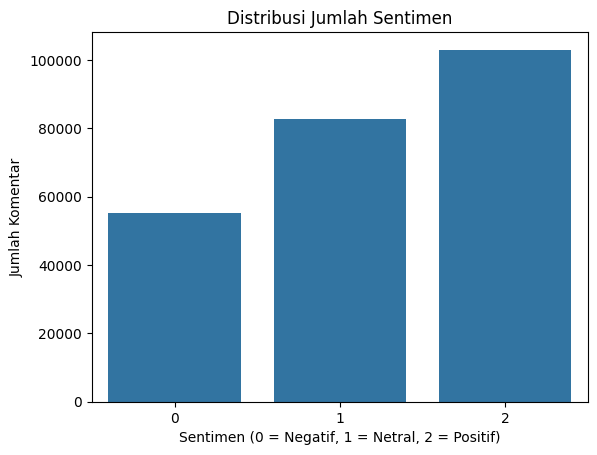

Sentiment
0     55105
1     82777
2    103046
Name: count, dtype: int64


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment_counts = df['Sentiment'].value_counts().sort_index()

sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Distribusi Jumlah Sentimen')
plt.xlabel('Sentimen (0 = Negatif, 1 = Netral, 2 = Positif)')
plt.ylabel('Jumlah Komentar')
plt.show()

print(sentiment_counts)


# Preprocessing

For preprocessing step, we need to lowecase all the comment, remove url, remove mention, and remove number and symbols. So that  our model will learn better.

In [ ]:
import re
import string

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)  # remove url
    text = re.sub(r"@\w+", "", text)     # remove mention
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # remove number & symbols
    return text.strip()

df['clean_comment'] = df['Comment'].apply(clean_text)
df.head(5)


,Unnamed: 0,Comment,Sentiment,clean_comment
0,0,lets forget apple pay required brand new iphon...,1,lets forget apple pay required brand new iphon...
1,1,nz retailers don’t even contactless credit car...,0,nz retailers dont even contactless credit card...
2,2,forever acknowledge channel help lessons ideas...,2,forever acknowledge channel help lessons ideas...
3,3,whenever go place doesn’t take apple pay doesn...,0,whenever go place doesnt take apple pay doesnt...
4,4,apple pay convenient secure easy use used kore...,2,apple pay convenient secure easy use used kore...


## Vectorizing

vectorizing is used to encode text into number because machine can't understand text, they only understand number. There are some techniques for vectorization, such as Bag of Word, TF-IDF, etc. In this model, we will use TF-IDF which gives weight to important words. TF-IDF suits well for **Sentiment Analysis**  

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_comment'])

## Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

y=df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In this model, we will use **Logistic Regression** algorithm because it works well with TF-IDF Vectorization

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

              precision    recall  f1-score   support

           0       0.78      0.66      0.71     11023
           1       0.75      0.83      0.79     16631
           2       0.83      0.82      0.83     20532

    accuracy                           0.79     48186
   macro avg       0.79      0.77      0.78     48186
weighted avg       0.79      0.79      0.79     48186

📊 Metrics:
Accuracy  : 0.7891
F1 Score  : 0.7878
Precision : 0.7908
Recall    : 0.7891
MCC       : 0.6735


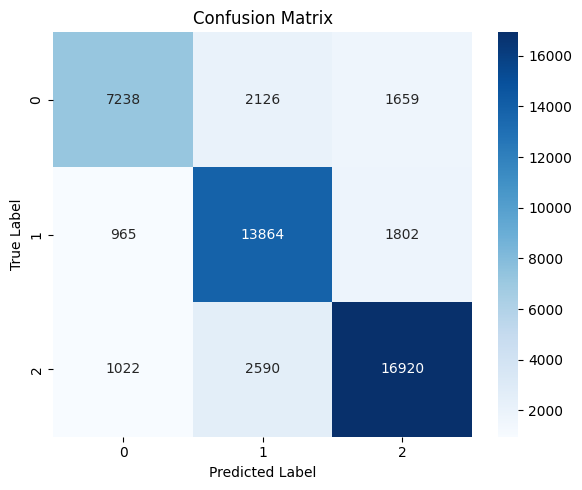

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, matthews_corrcoef

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

print("📊 Metrics:")
print(f"Accuracy  : {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score  : {f1_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Precision : {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall    : {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"MCC       : {matthews_corrcoef(y_test, y_pred):.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

labels = sorted(y.unique())

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

Data plot above shows that our model is not good enough, but also not bad. So, we can try to optimize it. 

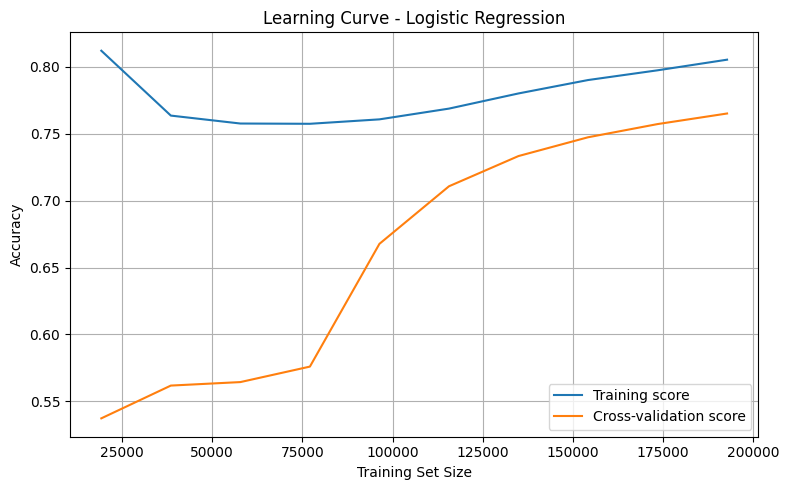

In [15]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.title('Learning Curve - Logistic Regression')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


From the learning curve of the model above, we can see that training score is dropping when training  set size is between 25-50 thousand, but increasing when training size bigger than 80 thousand. Also, we know that the bigger the training size, the better the cross-validation score

# Tuning

We will try to search a better parameter for TF-IDF Vectorization manually first.

In [21]:
tfidf = TfidfVectorizer(
    max_features=8000,
    ngram_range=(1, 2),      # pakai unigram + bigram
    min_df=5,                # minimal kata muncul di 5 dokumen
    max_df=0.8,              # maksimal di 90% dokumen (buang kata terlalu umum)
    sublinear_tf=True
)

X = tfidf.fit_transform(df['clean_comment'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.79      0.66      0.72     11023
           1       0.74      0.84      0.79     16631
           2       0.83      0.82      0.83     20532

    accuracy                           0.79     48186
   macro avg       0.79      0.77      0.78     48186
weighted avg       0.79      0.79      0.79     48186

📊 Metrics:
Accuracy  : 0.7899
F1 Score  : 0.7887
Precision : 0.7924
Recall    : 0.7899
MCC       : 0.6751


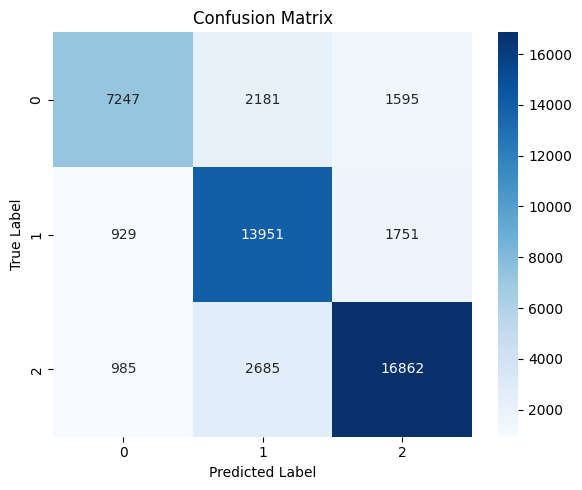

In [22]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

print("📊 Metrics:")
print(f"Accuracy  : {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score  : {f1_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Precision : {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall    : {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"MCC       : {matthews_corrcoef(y_test, y_pred):.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

labels = sorted(y.unique())

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

from plotting above, we know that it doesn't bring too much changes to our predictions. So, we will try to find the most optimal parameter using Randomized Search. Actually, there is some methods to find the best parameter, such as Randomized Search, Grid Search, and Bayesian Optimization. But, we use Randomized Search because it works well if we don't know the best combination.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

#this pipeline used to vectorize text → train model → make prediction.
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=1000))
])

#parameter grid is used to search the best combination from RandomizedSearch
param_grid = {
    'tfidf__max_features': [5000, 7000, 10000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'tfidf__min_df': [3, 5, 10],
    'tfidf__max_df': [0.7, 0.8, 0.9],
    'clf__C': [0.1, 1, 10]  # untuk Logistic Regression (regularisasi)
}

In [25]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_grid,
    n_iter=20,              # hanya 20 kombinasi acak
    scoring='f1_weighted',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
random_search.fit(df['clean_comment'], y)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                             ('clf',
                                              LogisticRegression(max_iter=1000))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'clf__C': [0.1, 1, 10],
                                        'tfidf__max_df': [0.7, 0.8, 0.9],
                                        'tfidf__max_features': [5000, 7000,
                                                                10000],
                                        'tfidf__min_df': [3, 5, 10],
                                        'tfidf__ngram_range': [(1, 1), (1, 2)]},
                   random_state=42, scoring='f1_weighted', verbose=1)

The picture above shows that the best estimator is max_df = 0.8 (means that we ignore words that appear in >80% of documents ), max_features = 10000 (means that we only use 10000 most important words), and min_df = 3 (means that we oonly use words that shows more or equal than 3 in documents). After that, we will use best estimator to train our model again

In [27]:
best_model = random_search.best_estimator_

# Split ulang tanpa transformasi manual
X_train_text, X_test_text, y_train, y_test = train_test_split(
    df['clean_comment'], y, test_size=0.2, random_state=42
)

# Gunakan pipeline langsung
y_pred = best_model.predict(X_test_text)

# Evaluasi
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.71      0.76     11023
           1       0.78      0.85      0.82     16631
           2       0.86      0.85      0.85     20532

    accuracy                           0.82     48186
   macro avg       0.82      0.81      0.81     48186
weighted avg       0.82      0.82      0.82     48186



We can see it is way more better than the baseline model

# Deployment

For deployment, we will use joblib

In [28]:
import joblib

joblib.dump(best_model, 'sentiment_pipeline.pkl')

['sentiment_pipeline.pkl']

In [ ]:
model = joblib.load('sentiment_pipeline.pkl')

In [ ]:
test_comments = [
    "The restaurant smells disgusting",
    "Its very delicious, nice!",
    "Just so-so"
]

predictions = model.predict(test_comments)

for comment, pred in zip(test_comments, predictions):
    print(f"Comment: {comment}\nSentiment Prediction: {pred}\n")


Comment: The restaurant smells disgusting
Sentiment Prediction: 0

Comment: Its very delicious, nice!
Sentiment Prediction: 2

Comment: Just so-so
Sentiment Prediction: 1

